# Assignment - 2
- Week - 3
- Narava Pranay manikanta
- MT50255
- Date : 10-02-2022

### Import the main libraries (numpy, pandas, seaborn, matplotlib)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read the multiTimeline csv File

In [2]:
timeline = pd.read_csv("multiTimeline.csv")

In [3]:
timeline.head()

,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


### convert the 'month' column into a ‘DateTime’ and Making as index

In [4]:
timeline['Month']= pd.to_datetime(timeline['Month'])

In [5]:
timeline

,Month,Diet,Gym,Finance
0,2004-01-01,100,31,48
1,2004-02-01,75,26,49
2,2004-03-01,67,24,47
3,2004-04-01,70,22,48
4,2004-05-01,72,22,43
...,...,...,...,...
163,2017-08-01,46,52,43
164,2017-09-01,44,50,47
165,2017-10-01,44,47,45
166,2017-11-01,41,47,47


In [6]:
df = timeline.set_index('Month')

In [7]:
df

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43
...,...,...,...
2017-08-01,46,52,43
2017-09-01,44,50,47
2017-10-01,44,47,45


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Diet     168 non-null    int64
 1   Gym      168 non-null    int64
 2   Finance  168 non-null    int64
dtypes: int64(3)
memory usage: 5.2 KB


### Visualize the data with matplotlib for data frame 'Diet'

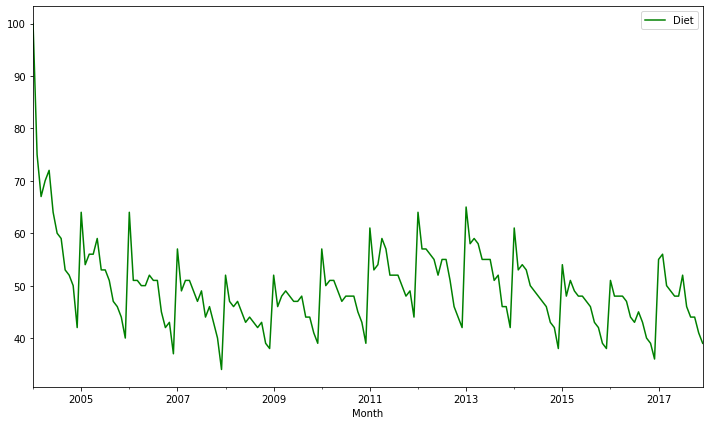

In [9]:
fig, ax = plt.subplots(figsize = (12,7))
df['Diet'].plot(ax =ax, legend =True, color = 'g')

### Caluculate Rolling Avg of 'Diet'

In [10]:
df['rolling_Diet'] = df['Diet'].rolling(2).mean()
df.head()

,Diet,Gym,Finance,rolling_Diet
Month,,,,
2004-01-01,100,31,48,NaN
2004-02-01,75,26,49,87.5
2004-03-01,67,24,47,71.0
2004-04-01,70,22,48,68.5
2004-05-01,72,22,43,71.0


### Visualize the data with matplotlib for data frame 'Gym'

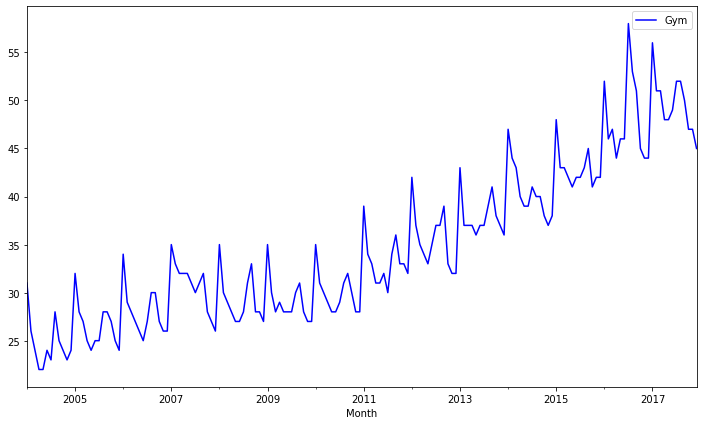

In [11]:
fig, ax = plt.subplots(figsize = (12,7))
df['Gym'].plot(ax =ax, legend =True, color = 'b')

### Caluculate the rolling Avg of 'Gym'

In [12]:
df['rolling_Gym'] = df['Gym'].rolling(2).mean()
df.head()

,Diet,Gym,Finance,rolling_Diet,rolling_Gym
Month,,,,,
2004-01-01,100,31,48,NaN,NaN
2004-02-01,75,26,49,87.5,28.5
2004-03-01,67,24,47,71.0,25.0
2004-04-01,70,22,48,68.5,23.0
2004-05-01,72,22,43,71.0,22.0


### Visualization of data with matplotlib of both'Diet' & 'Gym'

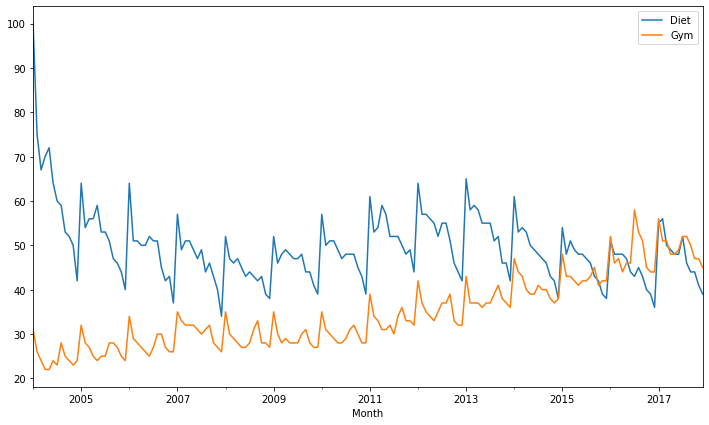

In [13]:
fig, ax = plt.subplots(figsize = (12,7))
df.plot(y = ['Diet' , 'Gym'], ax =ax, legend =True)

### Finding Correlation coefficient btw "Diet" & "Gym"

In [15]:
corr = df['Diet'].corr(df['Gym'])
corr

-0.10076364593053085

- the correlation between the Diet and the Gym is very little negative correlation

### Performing ‘differencing’ to remove the trend from a time series

In [16]:
df['diff_Diet'] = df['Diet'].diff()


In [17]:
df['diff_Gym'] = df['Gym'].diff()

In [18]:
df

,Diet,Gym,Finance,rolling_Diet,rolling_Gym,diff_Diet,diff_Gym
Month,,,,,,,
2004-01-01,100,31,48,NaN,NaN,NaN,NaN
2004-02-01,75,26,49,87.5,28.5,-25.0,-5.0
2004-03-01,67,24,47,71.0,25.0,-8.0,-2.0
2004-04-01,70,22,48,68.5,23.0,3.0,-2.0
2004-05-01,72,22,43,71.0,22.0,2.0,0.0
...,...,...,...,...,...,...,...
2017-08-01,46,52,43,49.0,52.0,-6.0,0.0
2017-09-01,44,50,47,45.0,51.0,-2.0,-2.0
2017-10-01,44,47,45,44.0,48.5,0.0,-3.0


### Visualization of data with matplotlib of both'diff_Diet' & 'diff_Gym'

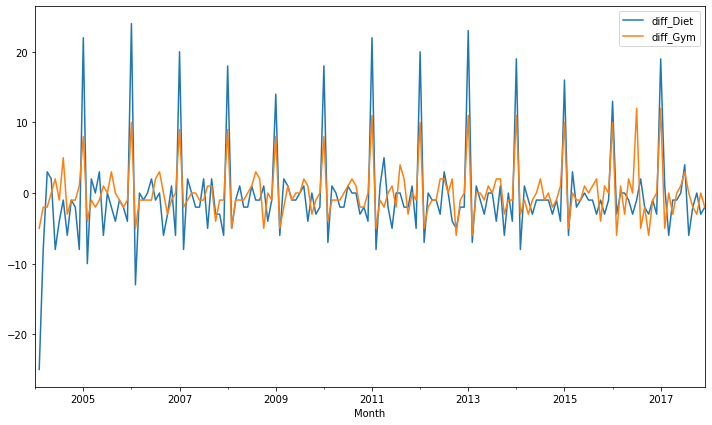

In [19]:
fig, ax = plt.subplots(figsize = (12,7))
df.plot(y = ['diff_Diet' , 'diff_Gym'], ax =ax, legend =True)

### Finding Correlation coefficient between the diff_Diet & diff_Gym

In [20]:
corr_of_diff = df['diff_Diet'].corr(df['diff_Gym'])
corr_of_diff

0.7587070420619362

- The Correlation coefficient betyween the Diff_Diet and Diff_Gym can be considered highly correlated

### Visualization of Diet data with matplotlib of autocorrelation_plot

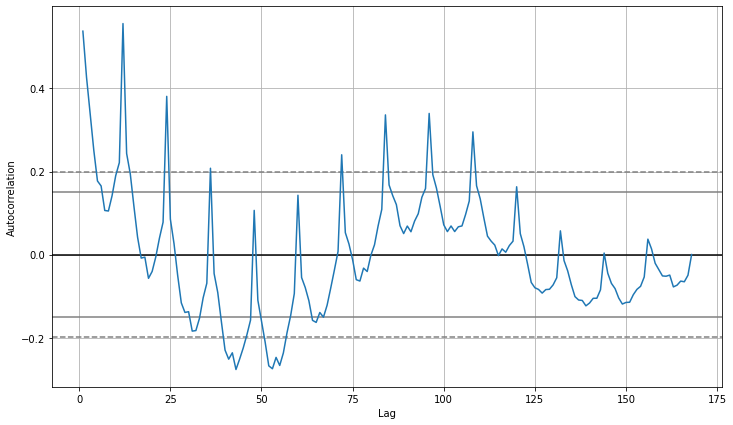

In [21]:
fig, ax = plt.subplots(figsize = (12,7))
x = pd.plotting.autocorrelation_plot(df['Diet'],ax=ax)

- The Doated line in auto_correlation plot represents the boundaries of  the nonrejection region

#### What is the seasonality?
- Seasonality in time series data is the frequency of variations that happen on a regular basis in a year, such as weekly, monthly, or quarterly.